<a href="https://colab.research.google.com/github/ykato27/Image-Classification/blob/main/3_6_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# データ増大（data augmentation）

データ増大（データ拡張，data augmentation）は，元の入力データをランダムに変形することにより，似たようなデータを増やす技術です．データ増大はNumPyでもできるのですが，ここでは Keras の`ImageDataGenerator` を用いて実現します．

Data augmentation is a technique to increase the number of similar data by randomly transforming the original input data. Although data augmentation can be done with NumPy, we will use the `ImageDataGenerator` of Keras to achieve this.


## Cifar-10

Cifar-10 （Canadian Institute For Advanced Research）は，10種類に分類された 6万枚の $32\times 32$のカラー画像データです．分類は，車，鳥，猫，鹿，犬，カエル，馬，船，トラックであり，それぞれ6000枚が用意されています． Cifar-10 は人気のあるデータセットですが，MNIST よりもはるかに学習が難しいです．

Cifar-10 (Canadian Institute For Advanced Research) is a collection of 60,000 $32\times 32$ color images classified into 10 categories. The categories are cars, birds, cats, deer, dogs, frogs, horses, boats, and trucks, and there are 6,000 images of each category. Cifar-10 is a popular dataset, but it is much harder to train than MNIST.




**Cifar-10 の読み込み Loading Cifar-10**


`cifar10.load_data()` でデータを読み込むと NumPy 配列の形式になります．

`cifar10.load_data()` loads the data in the form of NumPy array.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# データの読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()


170508288/170498071 [==============================] - 3s 0us/step


訓練用入力データセットは $32\times 32$ で色について3チャンネル（RGB）のデータが50000枚です．チャンネルが最後になっています．

The input dataset for training is $32\times 32$ with 50000 pieces of 3-channel (RGB) data for colors. The channel is in last place.

In [2]:
X_train.shape

(50000, 32, 32, 3)

値は0以上255以下の整数値なので，255で割って実数値とします．また，Keras の `to_categorical()` 関数を用いてラベルを one-hot 表現に変換します．

Since the value is an integer between 0 and 255, divide it by 255 to make it a real number between 0 and 1. We also use the `to_categorical()` function of Keras to convert the label to a one-hot representation.

In [3]:
#0以上1以下の値にしてから，Kerasのデータ形式に変換
#array[:, :, :, ::-1]で最後のインデックスを逆順に並べることにより，色をRGBからBGRに直す
x_train, x_test = X_train[:, :, :, ::-1] / 255.0, X_test[:, :, :, ::-1] / 255.0


#Kerasのto_categorical 関数を用いてラベルを hot-one 表現に変換
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

**画像を一枚ずつ見てみる**

画像を表示させるのは PyPlot でもできますが，ここではより高機能な cv2 （OpenCV）を使います．

Let's look at the images one by one.

Displaying images can be done with PyPlot, but here we will use the more powerful tool cv2 (OpenCV).

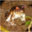

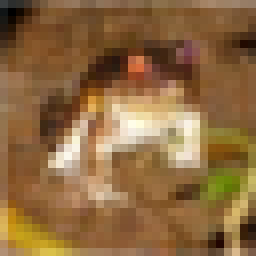

In [4]:
import cv2
#サポートバッチのインポート
from google.colab.patches import cv2_imshow

i = 0
image = x_train[i]*255
cv2_imshow(image)
resized_image = cv2.resize(image,(256,256), interpolation=cv2.INTER_AREA)
cv2_imshow(resized_image)

**画像をまとめて表示させる**

画像を4列で拡大して表示させます．

Display enlarged images in four columns.

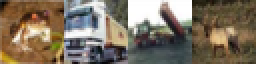

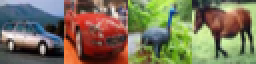

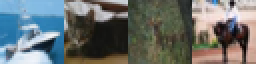

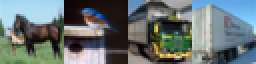

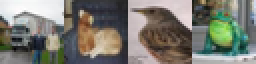

In [5]:
def show_imgs(imgs):
  # imgs: 表示させる画像のデータセット 
  imgs_num = len(imgs) #画像の数
  row_num = np.ceil(imgs_num/4).astype('int8')#行数
  for i in range(row_num):
    row_images =[]
    for j in range(4):
      if 4*i+j < imgs_num:
        resized_image = cv2.resize(imgs[4*i+j],(64,64), interpolation=cv2.INTER_AREA)
        row_images.append(resized_image)
    
    #4つの画像を横方向に結合して表示
    row_images = np.concatenate(np.array(row_images), axis=1)
    cv2_imshow(row_images*255.0)
    
show_imgs(x_train[0:20])


## 9.2 Keras でデータ増大 Augmentation by Keras

Keras には `ImageDataGenerator` といデータ増大のためのクラスが用意されています． `ImageDataGenerator` には様々なパラメータがありますが，例えば以下のようなものがあります．

Keras provides a class for data augmentation called `ImageDataGenerator`. The `ImageDataGenerator` has various parameters as follows.


####横方向のシフト Horizontal shift

In [6]:
datagen = ImageDataGenerator(width_shift_range=0.5)

とすると，**横方向にランダムに最大で 50% 平行移動**するインスタンスが生成されます．

`datagen.flow(データセット, batch_size)` は `[0]` をつけたり，`for` で呼びだすと実行されます． 画像の選び方，シフトさせ具合は乱数で決まっているので，下の`x` と `y` は等しくありません．

The above cell creates an instance that **randomly moves up to 50% parallel in the horizontal direction.**

`datagen.flow(dataset, batch_size)` will be executed with `[0]` or by calling `for`. Note that `x` and `y` below are not equal, since the selection and shifting of images is determined by random numbers.

In [7]:
datagen.flow(x_train, batch_size=10)[0].shape

(10, 32, 32, 3)

(10, 32, 32, 3) (10, 32, 32, 3)


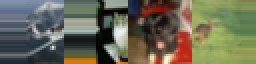

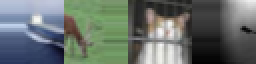

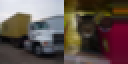

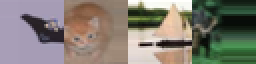

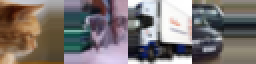

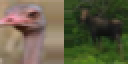

In [8]:
x = datagen.flow(x_train, batch_size=10)[0]
y = datagen.flow(x_train, batch_size=10)[0]

print(x.shape, y.shape)
show_imgs(x)
show_imgs(y)


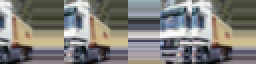

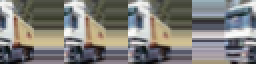

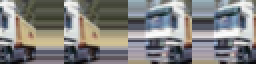

In [9]:
max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

**縦方向のシフト vertical shift**

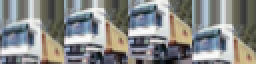

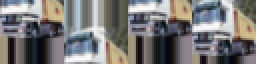

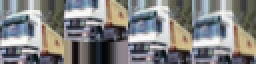

In [10]:
datagen = ImageDataGenerator(height_shift_range=0.5)
max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

**拡大・縮小 zooming in and out**

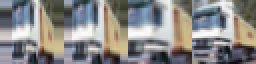

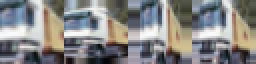

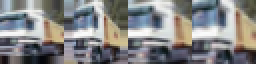

In [11]:
datagen = ImageDataGenerator(zoom_range=0.5)
max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

**せん断 Shearing**

剪断（せんだん）とは，定数 $m$ に対して
$$ [x,y] \mapsto [x, mx+y]$$
という変換を行うことです．

Shearing is the above transfoiration for a constant $m$.

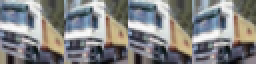

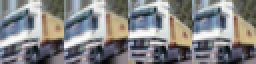

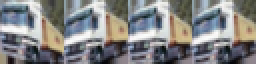

In [12]:
datagen = ImageDataGenerator(shear_range=20.0)
max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

**左右反転・上下反転**

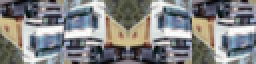

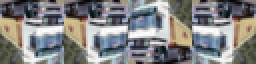

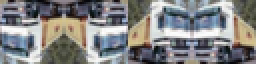

In [13]:
datagen = ImageDataGenerator(horizontal_flip = True, vertical_flip = True)
max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

**ランダムカット（ランダム消去）Random cut (or erasing)**

ランダムに長方形領域を削除することをランダムカットといいます．ランダムカットは `ImageDataGenerator` に標準では入っていませんが，プラグインが，
https://github.com/yu4u/cutout-random-erasing に公開されています．パラメータは以下の通りです．

* p : the probability that random erasing is performed
* s_l, s_h : minimum / maximum proportion of erased area against input image
* r_1, r_2 : minimum / maximum aspect ratio of erased area
* v_l, v_h : minimum / maximum value for erased area
* pixel_level : pixel-level randomization for erased area

Randomly deleting a rectangular area is called random cut. Random cut is not included in `ImageDataGenerator` by default, but a plugin is available at the avove site. 

In [14]:
!git clone https://github.com/yu4u/cutout-random-erasing ./random_eraser 
                                                      #github から cutout-random-erasingh を random_eraser にコピー

import sys
sys.path.append("/content/random_eraser/")  #モジュールのあるディレクトリを直接指定してパスを通す

from random_eraser import get_random_eraser # https://github.com/yu4u/cutout-random-erasing 

Cloning into './random_eraser'...
remote: Enumerating objects: 30, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 30 (delta 0), reused 1 (delta 0), pack-reused 26
Unpacking objects: 100% (30/30), done.


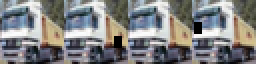

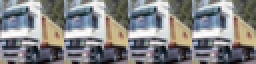

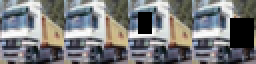

In [15]:
datagen = ImageDataGenerator(
            preprocessing_function = get_random_eraser(p=0.5, s_l=0.02, s_h=0.2, r_1=0.3, r_2=1/0.3, v_l=0, v_h=0))

max_img_num = 12
imgs = []
for img in datagen.flow(x_train[1:2], batch_size=1):
    imgs.append(img[0])
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if len(imgs) >= max_img_num: 
      break
show_imgs(imgs)

## CNN の Cifar-10 に対する学習 Training CNNs for Cifar-10


これまで通り，NumPy-CuPy を用いて学習しますが，データ増大には Keras の ImageDataGenerator を用います．

As before, we train using NumPy-CuPy, but we use Keras' ImageDataGenerator for data augmentation.

データの読み込み，データ拡張の設定，モデル（ネットワーク）の生成およびコンパイルを行います．

Loading data, setting up data extensions, generating and compiling models (networks).

In [16]:
import cupy as cp

最適化手法のクラス 

Optimization methos

In [17]:
#@title
class SGD:
  def __init__(self, learning_rate = 0.01):
    self.lr = learning_rate

  def update(self, params, grads):
    for key in params:
      params[key] -= self.lr * grads[key] 

class Momentum:
  def __init__(self, learning_rate = 0.01, alpha = 0.5):
    '''
    self.lr = learning_rate : 学習係数
    self.alpha = alpha      : alpha
    '''
    self.lr = learning_rate
    self.alpha = alpha
    self.v = None 

  def update(self, params, grads):
    '''
    params : 更新するパラメータ
    grads  : 目的関数のパラメータに関する勾配
    self.v : モメンタム，パラメータと同じ形式

    '''
    # self.v の初期化
    if self.v is None:
      self.v = {}
      for key in params:
        self.v[key] = cp.zeros_like(params[key])
    
    # モメンタムとパラメータの更新
    for key in params:
      self.v[key] = self.alpha * self.v[key] - self.lr * grads[key] 
      params[key] += self.v[key]

class Adam:
  def __init__(self, learning_rate=0.001, beta1=0.9, beta2=0.999):
    self.learning_rate = learning_rate
    self.beta1 = beta1
    self.beta2 = beta2
    self.iter = 0
    self.m = None
    self.v = None
    
  def update(self, params, grads):
    if self.m is None:
      self.m, self.v = {}, {}
      for key in params:
        self.m[key] = cp.zeros_like(params[key])
        self.v[key] = cp.zeros_like(params[key])

    self.iter += 1
    lr_t  = self.learning_rate * cp.sqrt(1.0 - self.beta2**self.iter) / (1.0 - self.beta1**self.iter)         
      
    for key in params.keys():
      self.m[key] += (1 - self.beta1) * (grads[key] - self.m[key])
      self.v[key] += (1 - self.beta2) * (grads[key]**2 - self.v[key])
      params[key] -= lr_t * self.m[key] / (cp.sqrt(self.v[key]) + 1e-7)

class AdaGrad:
  def __init__(self, learning_rate = 0.01):
    self.learning_rate = learning_rate
    self.h = None
      
  def update(self, params, grads):
    if self.h is None:
      self.h = {}
      for key in params:
        self.h[key] = cp.zeros_like(params[key])
        
    for key in params:
      self.h[key] += grads[key] * grads[key]
      params[key] -= self.learning_rate * grads[key] / (cp.sqrt(self.h[key]) + 1e-7)  

層のクラス

Classes of layers

In [18]:
#@title

def softmax(a):   
  # a がベクトルのとき
  if a.ndim == 1:
    c = cp.max(a)#オーバーフロー対策1
    x = a-c
    x = 709*(x >= 709) + x*(x<709)#オーバーフロー対策2
    exp_x = cp.exp(x)
    sum_exp_x = cp.sum(exp_x)
    return exp_x/sum_exp_x
    
  # a が２階の配列のとき
  a = a.T
  c = cp.max(a, axis=0) #オーバーフロー対策1
  x = a - c
  x = 709*(x >= 709) + x*(x<709) #オーバーフロー対策2
  exp_x = cp.exp(x)
  sum_exp_x = cp.sum(exp_x, axis=0)
  return (exp_x/sum_exp_x).T

def sigmoid(x):
  x = -709*(x <= -709)+709*(x >= 709) + x*(x>-709) *(x<709) #オーバーフロー対策
  return 1/(1+cp.exp(-x))


class Affine:
  def __init__(self, W, b):
    self.W = W
    self.b = b
    self.x = None
    self.dW = None
    self.db = None
    self.xshpe = None
    
  def forward(self, x):
    #2階の配列に直す
    self.xshape = x.shape
    x = x.reshape(self.xshape[0],-1)
    
    self.x = x
    out = cp.dot(self.x, self.W) +self.b
    return out
  
  def backward(self,dout):
    self.dW = cp.dot(self.x.T, dout)
    self.db = cp.sum(dout, axis=0)
    dx = cp.dot(dout, self.W.T)
    
    #元の形に戻す
    dx = dx.reshape(*self.xshape)# *はカッコを外す 
    return dx
  
class Relu:       ####Relu層の定義
  def __init__(self):
    self.mask = None
    
  def forward(self, x):
    self.mask = (x > 0)  # x> 0 ならTrue , x<= 0 ならFalse
    out = x * self.mask  # x> 0 なら x * 1  , x<= 0 なら x * 0
    return out
  
  def backward(self,dout):
    dx = dout * self.mask
    return dx

class Sigmoid:
  def __init__(self):
    self.y = None

  def forward(self, x):
    self.y = sigmoid(x)
    return self.y
  
  def backward(self,dout):
    dx = dout*(1-self.y)*self.y
    return dx

  
class SoftmaxWithLoss:
  def __self__(self):
    self.loss = None
    self.y = None
    self.t = None
    
  def forward(self, x, t):
    y = softmax(x)
    self.y = y
    self.t = t
    batch_size = y.shape[0]
    return -cp.sum(t*cp.log(y+1e-7))/batch_size   # 1e-7 = 10^(-7)はlogの中に0を入力するのを防止するため
  
  def backward(self):
    batch_size = self.y.shape[0]
    dx = (self.y-self.t)/batch_size
    return dx
  
class BatchNormalization:
  def __init__(self, gamma = 1, beta = 0, momentum=0.9, running_mean=None, running_var=None):    
    self.beta = beta
    self.gamma = gamma
    self.momentum = momentum
    
    # テスト時に使用する平均と分散
    self.running_mean = running_mean
    self.running_var = running_var
   
    self.std = None
    self.xc = None
    self.y = None
    self.xshape = None
  
  def forward(self, x, train_flag = True):
    
    #2階の配列に直す
    self.xshape = x.shape
    x = x.reshape(self.xshape[0], -1)
    
    
    if self.running_mean is None:
      D = x.shape[1]
      self.running_mean = cp.zeros(D)
      self.running_var = cp.zeros(D)
    
    if train_flag:
      mu = cp.mean(x, axis=0)  #バッチについての平均．
      var = cp.mean((x-mu)**2, axis=0) 
      std = cp.sqrt(var+10e-7)     
      xc = (x-mu)/std    
      y = self.gamma * xc + self.beta
      
      self.std = std
      self.xc = xc
      
      self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu
      self.running_var = self.momentum * self.running_var + (1-self.momentum) * var  
      
    else:
      xc = (x - self.running_mean) / (cp.sqrt(self.running_var + 10e-7)) 
      y = self.gamma * xc + self.beta
      
    #yをxの元の形と同じ形にする
    y = y.reshape(*self.xshape)
    return y      
  
  def backward(self, dout):
    #2階の配列に直す
    dout = dout.reshape(self.xshape[0], -1)
    
    
    self.dbeta = dout.sum(axis = 0) 
    self.dgamma = (self.xc * dout).sum(axis = 0)
    c = cp.mean(dout, axis=0)
    d = cp.mean(self.xc * dout, axis =0)
    dx = dout - c - self.xc * d
    dx *= self.gamma/self.std
    
    #dxをxの元の形と同じ形にする
    dx = dx.reshape(*self.xshape)
    return dx

class Dropout:
  def __init__(self, dropout_ratio = 0.5):
    self.dropout_ratio = dropout_ratio
    self.mask = None
  
  def forward(self, x, train_flag = True):
    if train_flag:
      self.mask = cp.random.rand(*x.shape) > self.dropout_ratio
      return x * self.mask
    else:
      return x * (1.0 - self.dropout_ratio)
  
  def backward(self, dout):
    return dout * self.mask


class Convolution:
  def __init__(self, F, b, stride=1, pad=0):
    self.F = F
    self.b = b
    self.stride = stride
    self.pad = pad
        
    #中間データ（backward時に使用）
    self.xshape = None   
    self.xh = None
    self.f_col = None
        
    # 勾配
    self.dF = None
    self.db = None

  def forward(self, x):
    OC, C, FH, FW = self.F.shape
    N, C, H, W = x.shape
    pad = self.pad
    stride = self.stride
    
    #出力サイズ
    OH = (H + 2 * pad - FH)//stride +1
    OW = (W + 2 * pad - FW)//stride +1
    
    # xh, xt, xcol の順に計算
    x_pad = cp.pad(x, [(0,0), (0,0), (pad, pad), (pad, pad)], 'constant')# (N,C,H,W)のうち最後の2つの方向に関してパディングする 
    xh = cp.zeros((N, C, FH, FW, OH, OW))
    for fh in range(FH):
      for fw in range(FW):
        xh[:,:,fh,fw,:,:] =x_pad[:,:,fh:fh + OH * stride:stride, fw: fw + OW * stride:stride] 
    xt = xh.transpose(0,4,5,1,2,3) # (N, OH, OW, C, FH, FW)
    xcol = xt.reshape(N,OH,OW,-1)  # (N, OH, OW,  C * FH * FW)
    
    #出力 y を計算
    fcol = self.F.reshape(OC,-1).T # (C * FH * FW, OC)
    y = (cp.dot(xcol,fcol) + self.b).transpose(0,3,1,2)  #  (N, OH, OW, OC).transpose(0,3,1,2) = (N, OC, OH, OW)
    
    #クラス変数として格納
    self.xshape = x.shape   
    self.xh = xh
    self.fcol = fcol
     
    return y
    
  def backward(self,dout):
    OC, C, FH, FW = self.F.shape
    N, OC, OH, OW = dout.shape
    N, C, H, W = self.xshape
    stride = self.stride
    pad = self.pad
    
    # db と dF を計算
    xh_col = self.xh.transpose(1,2,3,0,4,5).reshape(C,FH,FW,-1) # (C, FH, FW, N, OH, OW).reshape(C,FH,FW,-1) = (C, FH, FW, N * OH * OW)
    dout_col = dout.transpose(1,0,2,3).reshape(OC,-1) # (OC, N * OH * OW)
    self.db = dout_col.sum(axis = 1) # (OC,)
    self.dF = cp.dot(dout_col, xh_col.transpose(0,1,3,2)) # (OC, N * OH * OW)(C, FH, N * OH * OW,  FW) = (OC, C, FH, FW)
    
    # dout と F から dxt を計算
    dxt = cp.dot(dout.transpose(0,2,3,1), self.F.transpose(1,2,0,3))# (N, OH, OW, OC)( C, FH, OC, FW) = (N, OH, OW, C, FH, FW)
    dxt = dxt.transpose(0,3,1,2,4,5) #(N, OH, OW, C, FH, FW)
        
    #  dxt から dx を計算
    dx = cp.zeros((N, C, H+ 2*pad + stride - 1, W+ 2*pad + stride - 1), dtype=cp.float)  
    for fh in range(FH):
      for fw in range(FW):
        dx[:,:,fh:fh + OH * stride: stride, fw: fw + OW * stride: stride] += dxt[:,:,:, :,fh,fw]
    
    return dx[:, :, pad:H+pad, pad:W+pad] 
      
class Pooling:
  def __init__(self, S):
    self.S = S
        
    #中間データ（backward時に使用）
    self.xshape = None   
    self.argmax = None
 
  def forward(self, x):
    N, C, H, W = x.shape
    S = self.S
    FH, FW = S, S #本来は必要ないがコードを書く際に混乱するので導入
    stride = S
    self.xshape = x.shape
    
    #出力サイズ
    OH = H//S
    OW = W//S
    
    # xh, xt, xcol の順に計算    
    xh = cp.zeros((N, C, FH, FW, OH, OW))
    for fh in range(FH):
      for fw in range(FW):
        xh[:,:,fh,fw,:,:] =x[:,:,fh:fh + OH * stride:stride, fw: fw + OW * stride:stride] 
    xt = xh.transpose(0,1,4,5,2,3) # (N, C, OH, OW, FH, FW)
    xcol = xt.reshape(N, C, OH,OW, -1)  # (N, C, OH, OW,  FH * FW)
    
    #argmaxを格納
    self.argmax = xcol.argmax(axis = -1).flatten()
 
   
    #出力 y を計算
    y = xcol.max(axis = 4)  # (N, C, OH, OW)
    return y
    
  def backward(self,dout):
    N, C, OH, OW = dout.shape
    N, C, H, W = self.xshape
    S = self.S
    FH, FW = S, S #本来は必要ないがコードを書く際に混乱するので導入
    stride = S
   
    # dout と　self.argmax から dxt を計算
    dxt = cp.zeros((N * C * OH * OW, FH * FW))
    dxt[cp.arange(N * C * OH * OW), self.argmax] = dout.flatten() # (N * C * OH *OW, FH*FW) =  (N * C * OH * OW)
    dxt = dxt.reshape(N, C, OH, OW, FH, FW) 
        
    #  dxt から dx を計算
    dx = cp.zeros((N, C, H+ stride - 1, W+ stride - 1), dtype=cp.float)  
    for fh in range(FH):
      for fw in range(FW):
        dx[:,:,fh:fh + OH * stride: stride, fw: fw + OW * stride: stride] += dxt[:,:,:, :,fh,fw]
    
    return dx[:, :, :H, :W]  
      

ネットワーククラス

Class of networks 

In [19]:
#@title
import numpy as np
from collections import OrderedDict

class CNN:
  '''
    コンストラクタの引数
    input_size          : 入力データ一つの次元
    weight_decay_lambda : L2正則化の係数

    クラス変数
    self.layers      : 層を格納する順序付き辞書
                       活性化関数も独立した層として扱う
    self.params      : 重みパラメータを格納する辞書
                       W1,W2 などと番号が付くのはAffine層の重みのみ 
    '''
  def __init__(self, input_dim = (1,28,28),  weight_decay_lambda = 0.0):
    self.all_dim_list = [input_dim] #各層を流れるデータの形を格納
    self.params = {}
    self.weight_decay_lambda = weight_decay_lambda
    self.layers = OrderedDict()
    self.batchnorm_flag = [False]
    self.lastLayer = SoftmaxWithLoss()
    self.idx = 0
    
  #層の追加  
  '''
  affine 層を付け加える場合は，
  self.affine(size = 100, activation = 'relu', batchnorm = True) 
  とすると，層のサイズ100，活性化関数ReLU, バッチ正規化ありになる
  self.affine(100, activation = 'sigmoid')
  とすると，層のサイズ100，活性化関数Sigmoid, バッチ正規化なし
    
  dropout 層を付け加える場合は
  self.dropout(dropout_ratio = 0.6)
  とするとマスクされる確率が0.6
  self.dropout()
  とするとマスクされる確率が0.5
  
  畳み込み層の追加： 
  convolution(self, OC＝10, FH=3, FW=3, stride = 1, pad = 0, S = 2, activation = 'relu', batchnorm = False)
  とすると stride = 1，pad = 0，プーリングのサイズ2，活性化ReLU，バッチ正規化なし
  convolution(self, OC＝10, FH=3, FW=3)
  とすると stride = 1，pad = 0，S = 1 つまりプーリングなし，活性化なし，バッチ正規化なし
  '''
  
  #アファイン層を追加するメソッド
  def affine(self, size, activation='relu',  batchnorm = False):
    self.idx += 1
    idx = self.idx    
    self.all_dim_list.append(size)
    
    # Heの初期値によるパラメータの初期化
    scale = cp.sqrt(2.0 / np.prod(self.all_dim_list[idx - 1]))
    self.params['W' + str(idx)] = scale * cp.random.randn(np.prod(self.all_dim_list[idx-1]), size)
    self.params['b' + str(idx)] = cp.zeros(size)
    
    #アファイン層の追加
    self.layers['Affine' + str(idx)] = Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
    
    #バッチ正規化層の追加
    if batchnorm:
      self.batchnorm_flag.append(True)
      self.params['gamma' + str(idx)] = cp.ones(size)
      self.params['beta' + str(idx)] = cp.zeros(size)
      self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], 
                                                                       self.params['beta' + str(idx)])
    else:
      self.batchnorm_flag.append(False)
    
    #活性化層の追加
    if activation == 'relu':
      self.layers['Relu' + str(idx)] = Relu()
    if activation == 'sigmoid':
      self.layers['Sigmoid' + str(idx)] = Sigmoid()
  
  #ドロップアウト層をの追加するメソッド    
  def dropout(self, dropout_ratio = 0.5):
    self.layers['Dropout' + str(self.idx)] = Dropout(dropout_ratio)      
  
  #畳み込み層を追加するメソッド
  def convolution(self, OC, FH, FW, stride = 1, pad = 0, S = 2, activation=None, batchnorm = False):
    self.idx += 1
    idx = self.idx
    C, H, W =  self.all_dim_list[idx - 1]    
    
    #出力サイズ
    OH = (H + 2 * pad - FH)//stride +1 # //は切り捨て除算
    OW = (W + 2 * pad - FW)//stride +1
    
    # パラメータの初期化（Heの初期値）
    scale = cp.sqrt(2.0 / (C*FH*FW))
    self.params['F' + str(idx)] = scale * cp.random.randn(OC, C, FH, FW)
    self.params['b' + str(idx)] = cp.zeros(OC)
    
    #畳み込み層の追加
    self.layers['Conv' + str(idx)] = Convolution(self.params['F' + str(idx)], self.params['b' + str(idx)], 
                                                        stride = stride, pad = pad)          
    #バッチ正規化層の追加
    if batchnorm:
      self.batchnorm_flag.append(True)
      self.params['gamma' + str(idx)] = cp.ones(OC*OH*OW)
      self.params['beta' + str(idx)] = cp.zeros(OC*OH*OW)
      self.layers['BatchNorm' + str(idx)] = BatchNormalization(self.params['gamma' + str(idx)], 
                                                                       self.params['beta' + str(idx)])
    else:
      self.batchnorm_flag.append(False)
    
    #活性化層の追加
    if activation == 'relu':
      self.layers['Relu' + str(idx)] = Relu()
    if activation == 'sigmoid':
      self.layers['Sigmoid' + str(idx)] = Sigmoid()
    
    #プーリング層の追加
    if S > 1:
      self.layers['Pooling' + str(idx)] = Pooling(S)
      OH = OH//S
      OW = OW//S
      
    #出力サイズの格納
    self.all_dim_list.append((OC,OH,OW))
    
  
  #順方向の計算 #Softmaxの手前まで
  def predict(self, x, train_flg=False):
    for key, layer in self.layers.items():
      if "Dropout" in key or "BatchNorm" in key:
        x = layer.forward(x, train_flg)
      else:
        x = layer.forward(x)
    return x
  
  #誤差の計算
  def loss(self,x,t, train_flg=False):
    x = self.predict(x, train_flg)
    return self.lastLayer.forward(x ,t)
  
  #精度（クラッシュ対策でバッチに分割して計算）
  def accuracy(self, x, t, batch_size=100):
    acc = 0.0
    for i in range(int(x.shape[0] / batch_size)):
      tx = x[i*batch_size:(i+1)*batch_size]
      tt = t[i*batch_size:(i+1)*batch_size]
      y = self.predict(tx, train_flg=False)
      y = cp.argmax(y, axis=1)
      tt = cp.argmax(tt, axis=1)
      acc += cp.sum(y == tt)

    return acc / x.shape[0]
  
  #誤差逆伝搬法による勾配の計算
  def gradient(self,x,t):
    self.loss(x,t,train_flg = True)
    
    dout = self.lastLayer.backward()
    
    layers = list(self.layers.values())
    layers.reverse()
    for layer in layers:
      dout = layer.backward(dout)
    
    #出力辞書の生成
    grads = {}
    all_num = len(self.all_dim_list)
    
    for idx in range(1, all_num):
      #アファイン層か畳み込み層かで場合分けして勾配をgradsに追加
      if type(self.all_dim_list[idx]) == int:#アファインのときはデータの型は整数型
        grads['W' + str(idx)] = self.layers['Affine' + str(idx)].dW+ self.weight_decay_lambda * self.params['W' + str(idx)]
        grads['b' + str(idx)] = self.layers['Affine' + str(idx)].db
      else:#アファインのときはデータの型はtuple
        grads['F' + str(idx)] = self.layers['Conv' + str(idx)].dF+ self.weight_decay_lambda * self.params['F' + str(idx)]
        grads['b' + str(idx)] = self.layers['Conv' + str(idx)].db
      
      #正規化層の勾配をgradsに追加
      if self.batchnorm_flag[idx]:
        grads['gamma' + str(idx)] = self.layers['BatchNorm' + str(idx)].dgamma
        grads['beta' + str(idx)] = self.layers['BatchNorm' + str(idx)].dbeta
    
    return grads



### 学習を行う関数 Function for training

ここで`ImageDataGenerator`を用います．

The `ImageDataGenerator` is used here.


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from random_eraser import get_random_eraser # https://github.com/yu4u/cutout-random-erasing 

datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=2.0,  # set range for random shear
            zoom_range=0.1,  # set range for random zoom
            channel_shift_range=0,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function = get_random_eraser(p=0.5, s_l=0.02, s_h=0.1, r_1=0.3, r_2=1/0.3, v_l=0, v_h=0),
            # image data format, either "channels_first" or "channels_last"
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

In [21]:
import time

#学習用の関数
def training(network, x_train, t_train,  x_test, t_test, iters_num=10000,  batch_size=100, augmentation=False):
  '''
  この関数を使う前に optimizer を与えておく必要がある
  例：
  optimizer = SGD(learning_rate = 0.01)
  '''
  network.train_accuracy_list =[] 
  network.test_accuracy_list =[] 
  train_size = x_train.shape[0]
  t0 = time.time()

  for i in range(iters_num):
    if i%int(iters_num/10) ==0:
      #精度の記録 
      choice = cp.random.choice(len(x_train),len(x_test))
      x_train_part, t_train_part = x_train[choice], t_train[choice]
      train_accuracy = network.accuracy(x_train_part,t_train_part)
      test_accuracy = network.accuracy(x_test,t_test)
      network.train_accuracy_list.append(train_accuracy)
      network.test_accuracy_list.append(test_accuracy)
      t1 = time.time()
      print('iteration:', i, 'lap time:', t1-t0 ,' train_accuracy = ', train_accuracy,
            ' test_accuracy = ', test_accuracy)
      t0 = t1

    #ミニバッチを選ぶ
    batch_mask = cp.random.choice(train_size,batch_size, replace=False)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    if augmentation:
      #ImageDataGeneratorの入力はNumpy でチャンネルラスト
      x_batch, t_batch = datagen.flow(cp.asnumpy(x_batch.transpose(0,2,3,1)), cp.asnumpy(t_batch), batch_size=batch_size)[0]
      x_batch, t_batch = cp.array(x_batch.transpose(0,3,1,2)), cp.array(t_batch)

    #勾配を計算  
    grads = network.gradient(x_batch,t_batch)     

    # パラメータを更新 
    optimizer.update(network.params, grads)

  #精度の記録  
  choice = cp.random.choice(len(x_test),len(x_test))
  x_train_part, t_train_part = x_train[choice], t_train[choice]
  train_accuracy = network.accuracy(x_train_part,t_train_part)
  test_accuracy = network.accuracy(x_test,t_test)
  network.train_accuracy_list.append(train_accuracy)
  network.test_accuracy_list.append(test_accuracy)
  t1 = time.time()
  print('iteration:', i, 'lap time:', t1-t0 ,' train_accuracy = ', train_accuracy,
        ' test_accuracy = ', test_accuracy)
      

In [22]:
x_train_cp, x_test_cp = cp.array(x_train.transpose(0,3,1,2)), cp.array(x_test.transpose(0,3,1,2))

y_train_cp, y_test_cp = cp.array(y_train), cp.array(y_test)
y_test_cp.shape

(10000, 10)

In [23]:
network = CNN(input_dim=(3,32,32), weight_decay_lambda = 0.001)
network.convolution(OC = 16, FH = 3, FW =3, pad =1, S = 1, activation = 'relu')
network.convolution(OC = 16, FH = 3, FW =3, pad =1, S = 2, activation = 'relu')
network.convolution(OC = 32, FH = 3, FW =3, pad =1, S = 1, activation = 'relu')
network.convolution(OC = 32, FH = 3, FW =3, pad =2, S = 2, activation = 'relu')
network.affine(500)
network.affine(50)
network.dropout()
network.affine(10, activation = None)
network.dropout()


aurmentationなし 

100 * 5000 / 50000 = 10 エポック学習

10 epochs training with augmentation

iteration: 0 lap time: 14.31815218925476  train_accuracy =  0.0905  test_accuracy =  0.0964


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:297: DeprecationWarning: `cupy.float` is a deprecated alias for the Python scalar type `float`. Please use the builtin `float` or its corresponding NumPy scalar type `cupy.float_` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: DeprecationWarning: `cupy.float` is a deprecated alias for the Python scalar type `float`. Please use the builtin `float` or its corresponding NumPy scalar type `cupy.float_` instead.


iteration: 500 lap time: 48.28884744644165  train_accuracy =  0.3956  test_accuracy =  0.3995
iteration: 1000 lap time: 39.1657874584198  train_accuracy =  0.486  test_accuracy =  0.4752
iteration: 1500 lap time: 39.14410352706909  train_accuracy =  0.5264  test_accuracy =  0.5266
iteration: 2000 lap time: 39.94332504272461  train_accuracy =  0.5704  test_accuracy =  0.557
iteration: 2500 lap time: 39.13530921936035  train_accuracy =  0.618  test_accuracy =  0.6027
iteration: 3000 lap time: 39.13809776306152  train_accuracy =  0.6479  test_accuracy =  0.6184
iteration: 3500 lap time: 39.13664388656616  train_accuracy =  0.6645  test_accuracy =  0.6354
iteration: 4000 lap time: 39.13563656806946  train_accuracy =  0.7019  test_accuracy =  0.6657
iteration: 4500 lap time: 39.12736678123474  train_accuracy =  0.7202  test_accuracy =  0.6672
iteration: 4999 lap time: 39.1287157535553  train_accuracy =  0.7007  test_accuracy =  0.6518


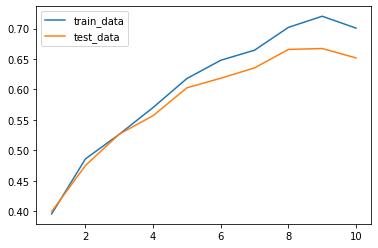

In [24]:
import matplotlib.pyplot as plt 

optimizer = Adam(learning_rate=0.001)
training(network, x_train_cp, y_train_cp, x_test_cp, y_test_cp, iters_num=5000, batch_size = 100)
x = np.arange(0,len(network.train_accuracy_list),1) 

#グラフが見にくくなるので初期値は表示しない
plt.plot(x[1:], network.train_accuracy_list[1:], label = 'train_data')  
plt.plot(x[1:], network.test_accuracy_list[1:], label = 'test_data')  

plt.legend() #グラフの線の説明を表示

augmentationあり

Without augmentation

In [25]:
network = CNN(input_dim=(3,32,32), weight_decay_lambda = 0.001)
network.convolution(OC = 16, FH = 3, FW =3, pad =1, S = 1, activation = 'relu')
network.convolution(OC = 16, FH = 3, FW =3, pad =1, S = 2, activation = 'relu')
network.convolution(OC = 32, FH = 3, FW =3, pad =1, S = 1, activation = 'relu')
network.convolution(OC = 32, FH = 3, FW =3, pad =2, S = 2, activation = 'relu')
network.affine(500)
network.affine(50)
network.dropout()
network.affine(10, activation = None)
network.dropout()


100 * 5000 / 50000 = 10 エポック学習

iteration: 0 lap time: 4.446393728256226  train_accuracy =  0.1002  test_accuracy =  0.0985


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:297: DeprecationWarning: `cupy.float` is a deprecated alias for the Python scalar type `float`. Please use the builtin `float` or its corresponding NumPy scalar type `cupy.float_` instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:242: DeprecationWarning: `cupy.float` is a deprecated alias for the Python scalar type `float`. Please use the builtin `float` or its corresponding NumPy scalar type `cupy.float_` instead.


iteration: 500 lap time: 68.86149954795837  train_accuracy =  0.4061  test_accuracy =  0.4112
iteration: 1000 lap time: 68.0766716003418  train_accuracy =  0.403  test_accuracy =  0.4214
iteration: 1500 lap time: 68.47050952911377  train_accuracy =  0.496  test_accuracy =  0.4906
iteration: 2000 lap time: 68.20321226119995  train_accuracy =  0.5196  test_accuracy =  0.5212
iteration: 2500 lap time: 68.32887053489685  train_accuracy =  0.5572  test_accuracy =  0.5453
iteration: 3000 lap time: 68.22551608085632  train_accuracy =  0.5465  test_accuracy =  0.545
iteration: 3500 lap time: 67.7879409790039  train_accuracy =  0.5809  test_accuracy =  0.5756
iteration: 4000 lap time: 68.0213086605072  train_accuracy =  0.5972  test_accuracy =  0.5899
iteration: 4500 lap time: 68.03876495361328  train_accuracy =  0.6196  test_accuracy =  0.6183
iteration: 4999 lap time: 67.91367435455322  train_accuracy =  0.6007  test_accuracy =  0.6046


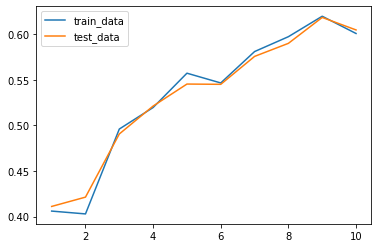

In [26]:
import matplotlib.pyplot as plt 

optimizer = Adam(learning_rate=0.001)
training(network, x_train_cp, y_train_cp, x_test_cp, y_test_cp, iters_num=5000, batch_size = 100,
         augmentation=True)
x = np.arange(0,len(network.train_accuracy_list),1) 

#グラフが見にくくなるので初期値は表示しない
plt.plot(x[1:], network.train_accuracy_list[1:], label = 'train_data')  
plt.plot(x[1:], network.test_accuracy_list[1:], label = 'test_data')  

plt.legend() #グラフの線の説明を表示

この結果を比較してもよく分からないことと思います．

You may not understand the comparison between these results.

###Kerasで学習 Training using Keras

cupy を使ってもまだ時間がかかるのでKerasでやってみます．

It still takes a long time using cupy, so let's try using Keras.

In [27]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Sequential

def CNN(input_shape=(32, 32, 3), class_num=10):
  model = Sequential()
  model.add(Conv2D(16, (3, 3), padding='same', kernel_initializer='he_normal', input_shape=input_shape))
  model.add(Activation('relu'))
  model.add(Conv2D(16, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  
  model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(Activation('relu'))
  model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))


  model.add(Flatten())
  model.add(Dense(512, activation='relu', kernel_initializer='he_normal'))
  model.add(Dropout(rate=0.5))
  model.add(Dense(class_num, kernel_initializer='he_normal'))
  model.add(Activation('softmax'))
  return model
  

In [28]:
import tensorflow.keras.backend as K

K.clear_session()

from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from random_eraser import get_random_eraser # https://github.com/yu4u/cutout-random-erasing 
import os
from tensorflow.keras.optimizers import Adam
 

# Cifar-10 の読み込み
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
x_train, x_test = (X_train / 255.0), (X_test / 255.0)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)  

# データ増大の設定
datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            zca_epsilon=1e-06,  # epsilon for ZCA whitening
            rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            shear_range=2.0,  # set range for random shear
            zoom_range=0.1,  # set range for random zoom
            channel_shift_range=0,  # set range for random channel shifts
            # set mode for filling points outside the input boundaries
            fill_mode='nearest',
            cval=0.,  # value used for fill_mode = "constant"
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False,  # randomly flip images
            # set rescaling factor (applied before any other transformation)
            rescale=None,
            # set function that will be applied on each input
            preprocessing_function = get_random_eraser(p=0.5, s_l=0.02, s_h=0.1, r_1=0.3, r_2=1/0.3, v_l=0, v_h=0),
            # image data format, either "channels_first" or "channels_last"
            # fraction of images reserved for validation (strictly between 0 and 1)
            validation_split=0.0)

# モデルを作成
model = CNN(input_shape=(32,32,3), class_num=10)

# モデルをコンパイル 
model.compile( Adam(lr=1e-3), loss="categorical_crossentropy", metrics=["acc"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        448       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 16)        2320      
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 16)        64        
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        4

学習係数をスケジュールして学習を行います．（20分以上かかるかもしれません．ランタイムを「GPU」にするのを忘れないでください．）

Scheduling a learning coefficient. (It may take more than 20 minutes. Don't forget to set the runtime to "GPU"). 

In [30]:
from tensorflow.keras.callbacks import LearningRateScheduler

#schedulerの設定
def step_decay(epoch):
    x = 0.002
    if epoch >= 30: x = 0.0008
    if epoch >= 40: x = 0.0001
    return x
decay = LearningRateScheduler(step_decay, verbose=1)
#datagen.fit(X_train)
#validationgen.fit(x_test)

#データ増大と学習率の変更をしながら学習
history = model.fit_generator(datagen.flow(x_train, y_train, batch_size=128), 
                              steps_per_epoch=len(x_train) // 128, epochs=50,
                              workers=8, use_multiprocessing=True, #これを指定するとイメージジェネレーターを並列にやってくれる 
                              validation_data=(x_test,y_test), callbacks=[decay])

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
390/390 [==============================] - 69s 96ms/step - loss: 1.8084 - acc: 0.3180 - val_loss: 1.6859 - val_acc: 0.4057
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.002.
390/390 [==============================] - 38s 95ms/step - loss: 1.3972 - acc: 0.4915 - val_loss: 1.5621 - val_acc: 0.4799
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.002.
390/390 [==============================] - 38s 94ms/step - loss: 1.2264 - acc: 0.5652 - val_loss: 1.1996 - val_acc: 0.5998
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002.
390/390 [==============================] - 37s 94ms/step - loss: 1.1021 - acc: 0.6115 - val_loss: 1.3519 - val_acc: 0.5747
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.002.
390/390 [==============================] - 39s 96ms/step - loss: 1.0152 - acc: 0.6481 - val_loss: 1.3846 - val_ac

テストデータに対する精度は約85%となりました．

The accuracy for the test data was about 85%.

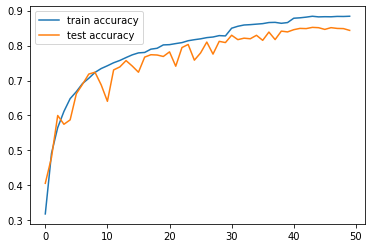

In [31]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
test_acc = history.history['val_acc']
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train accuracy')
plt.plot(x, test_acc, label = 'test accuracy')
plt.legend() #グラフの線の説明を表示
plt.show()


**データ増大なしの場合**

ちなみに，データ増大なしだと以下のようになります．（こちらは7分以内．）

Without data augmentation, the result is as follows. (This is within 7 minutes.)


In [32]:
from tensorflow.keras.callbacks import LearningRateScheduler

# モデルを作成
model = CNN(input_shape=(32,32,3), class_num=10)

# モデルをコンパイル 
model.compile( Adam(lr=1e-3), loss="categorical_crossentropy", metrics=["acc"])

#schedulerの設定
def step_decay(epoch):
    x = 0.002
    if epoch >= 30: x = 0.0008
    if epoch >= 40: x = 0.0001
    return x
decay = LearningRateScheduler(step_decay, verbose=1)

history = model.fit(x_train, y_train, batch_size=128, epochs = 50, verbose=1,validation_data=(x_test,y_test), callbacks=[decay])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 15s 36ms/step - loss: 1.5842 - acc: 0.4171 - val_loss: 1.3973 - val_acc: 0.5174
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 13s 33ms/step - loss: 1.1185 - acc: 0.6035 - val_loss: 1.2082 - val_acc: 0.5796
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 13s 33ms/step - loss: 0.9363 - acc: 0.6734 - val_loss: 1.0133 - val_acc: 0.6495
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 13s 33ms/step - loss: 0.8062 - acc: 0.7211 - val_loss: 1.0293 - val_acc: 0.6580
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.002.
391/391 [==============================] - 13s 33ms/step - loss: 0.7023 - acc: 0.7605 - val_loss: 0.9667 - val_ac

テストデータに対する精度は81%となりました．

The accuracy for the test data was 81%.

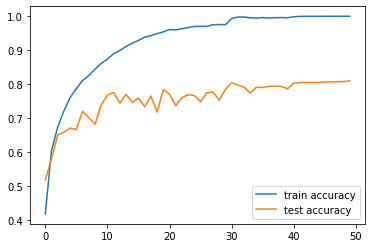

In [33]:
import matplotlib.pyplot as plt

train_acc = history.history['acc']
test_acc = history.history['val_acc']
x = np.arange(len(train_acc))
plt.plot(x, train_acc, label = 'train accuracy')
plt.plot(x, test_acc, label = 'test accuracy')
plt.legend() #グラフの線の説明を表示

訓練データに対する精度はこちらの方が上がりますが，汎化能力の向上の限界が早めに来ることが分かるかと思います．

The accuracy on the training data is better, but you can see that the limit of the improvement in generalization ability comes earlier.

In [34]:
x_train.shape

(50000, 32, 32, 3)

##PyTorchによる実装 Implementation by PyTorch

In [35]:
import datetime
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
 
# 畳み込みニューラルネットワークでMNIST画像分類
 
# モデルクラス定義
 
class CNN(nn.Module):
    def __init__(self):
        # クラスの初期化
        super(CNN, self).__init__()
        # 画像を畳み込みを行うまで
        self.head = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), stride=1, padding=1),
            nn.Conv2d(in_channels=16, out_channels=16, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=1),
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        # 畳み込みで得られたベクトルを出力層に順伝播させるまで
        self.tail = nn.Sequential(
            nn.Linear(2048, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
            nn.ReLU(),
            nn.Linear(50, 10)
        )
 
    def __call__(self, x):
        # 順伝播を計算する関数
        # :param x: 入力値
        h = self.head(x)
        h = h.view(-1, 2048)
        h = self.tail(h)
        y = F.log_softmax(h)
        return y
 
 

PyTorchではデータをミニバッチにして生成するための DataLoaderというクラスのインスタンスを用意する必要があります．

PyTorch requires an instance of a class called DataLoader to generate mini-batches of data.

In [36]:

# 学習
 
EPOCH_NUM = 10
BATCH_SIZE = 100
 
 
# データのダウンロードとDataLoderの生成
transform_train = transforms.Compose([transforms.RandomHorizontalFlip(p=0.1),
                                      transforms.RandomRotation(degrees=10),
                                      transforms.ToTensor(),
                                      transforms.RandomErasing(p=0.5, scale=(0.02, 0.1), 
                                                               ratio=(0.3, 3.3), value=0, inplace=False),
                                      transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
transform_test = transforms.Compose([transforms.ToTensor(),
                                     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
#train = torch.utils.data.Dataset(torch.from_numpy(train_x), torch.from_numpy(train_t))
train = datasets.CIFAR10('/content/', train=True, 
                         transform=transform_train, download=True)
train_loader = torch.utils.data.DataLoader(train, batch_size=BATCH_SIZE, shuffle=True)
test = datasets.CIFAR10(root='./data', train=False,download=True, 
                        transform=transform_test)
test_loader = torch.utils.data.DataLoader(test, batch_size=BATCH_SIZE, shuffle=True)
 
device = torch.device("cuda")

# モデルの定義
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())
# 学習開始
st = datetime.datetime.now()
for epoch in range(EPOCH_NUM):
    # ミニバッチ学習
    total_loss = 0
    for i, (x,t) in enumerate(train_loader):
        x, t = x.to(device, dtype=torch.float), t.to(device, dtype=torch.long)
        optimizer.zero_grad()
        y = model(x)
        loss = criterion(y, t)
        total_loss += loss.data
        loss.backward()
        optimizer.step()
    if (epoch+1) % 1 == 0:
        ed = datetime.datetime.now()
        correct = 0
        for i, (x,t) in enumerate (test_loader):
          x, t = x.to(device, dtype=torch.float), t.to(device, dtype=torch.long)
          y = model(x)
          correct += (y.argmax(axis=1) == t).float().sum()

        accuracy = correct / len(t)

        print("epoch:\t{}\ttotal loss:\t{}\ttime:\t{}".format(epoch+1, total_loss, ed-st), 
              "test_ccuracy = {}".format(accuracy))
        st = datetime.datetime.now()

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting /content/cifar-10-python.tar.gz to /content/


  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


epoch:	1	total loss:	847.4666748046875	time:	0:00:33.087289 test_ccuracy = 49.20000076293945
epoch:	2	total loss:	665.1822509765625	time:	0:00:33.162980 test_ccuracy = 58.27000045776367
epoch:	3	total loss:	577.2032470703125	time:	0:00:32.851107 test_ccuracy = 63.52000045776367
epoch:	4	total loss:	527.0576782226562	time:	0:00:32.737777 test_ccuracy = 66.20999908447266
epoch:	5	total loss:	492.7456970214844	time:	0:00:32.642222 test_ccuracy = 66.79999542236328
epoch:	6	total loss:	469.4662170410156	time:	0:00:32.240104 test_ccuracy = 69.68999481201172
epoch:	7	total loss:	446.671875	time:	0:00:32.612146 test_ccuracy = 69.43000030517578
epoch:	8	total loss:	432.7074279785156	time:	0:00:33.184532 test_ccuracy = 70.83999633789062
epoch:	9	total loss:	418.6085205078125	time:	0:00:32.665226 test_ccuracy = 71.97999572753906
epoch:	10	total loss:	408.4043884277344	time:	0:00:32.660981 test_ccuracy = 71.88999938964844
